# Datahåndtering og statistikk 

## - Lesing og plotting av data
## - Regresjon 
## - Gjennomsnitt 
## - Dateringer

Begreper knyttet til statistikk :
- Standardavvik 
    - Mål på spredning av datasettet 
         - skrives som = std()
- Sannysnelighet 
- Gjennomsnitt 
- Diagrammer 
    - Søylediagram 
    - Vendiagram 
    - osv.
- Prosentandeler 
- Regresjonsanalyse 

## Lesing og plotting av data
### Eksempeloppgave i timen

[[1.   1.9 ]
 [2.   1.71]
 [3.   1.84]
 [4.   1.76]
 [5.   1.74]
 [6.   1.89]
 [7.   1.75]]


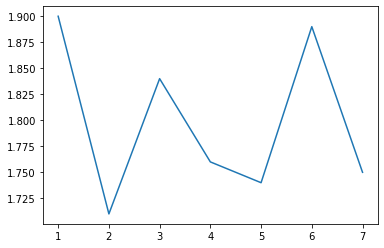

Snitt:  1.7985714285714285
Standardavvik : 0.07119963311072634


In [20]:
from pylab import *

data = loadtxt('test.txt', skiprows = 1, delimiter = ',')

nr = data[:,0]
hoyde = data[:,1]

print(data)

plot(nr, hoyde)
show()

snitt = mean(hoyde)
avvik = std(hoyde)

print("Snitt: ", snitt)
print("Standardavvik :", avvik)

## Underveisoppgave 

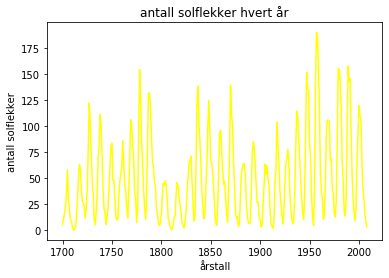

Snitt:  49.75210355987054
Standardavvik : 40.387084638624245


In [37]:
from pylab import * 

solflekk = loadtxt('solflekker.txt', skiprows = 1, delimiter = ',')

nr = solflekk[:,0]
hoyde = solflekk[:,1]

plot(nr, hoyde, color = 'yellow')
title('antall solflekker hvert år')
xlabel('årstall')
ylabel('antall solflekker')
show()

snitt = mean(hoyde)
avvik = std(hoyde)

print("Snitt: ", snitt)
print("Standardavvik :", avvik)


### Liten oppsummering så langt: 

* loadtxt() brukes til å importere textfiler (og kun tekstfiler) til programmet ditt, de blir importert som array-er i en array. 
* Høyt standardavvik vil si at du burde ta målingene på nytt
* for å klare å plotte datasamlingen til en graf, må man først definere to variabler som kan brukes i x-, og y-aksen slik for eksempel: 
    * nr = solflekk[:,0] hoyde = solflekk[:,1]
* for å finne gjennomsnittet: 
    * snitt = mean(hoyde)
* for å finne standardavvik 
    * avvik = std(hoyde)
* hvis den første kolonnen i tekstgrafen din ikke er relevant for målingene, kan man ikke ha med et visst antall rader ved å skrive slik: 
    * skiprows = 1
* du må definere hva du skiller målingene med 
    * delimiter = ','
   
#### Hvordan man bruker loadtxt : 
loadtxt('filnavn', skiprows = 1, delimeter = ',', dtype = str, usecols = (1, 2, 4))

# Regresjon 
#### Å finne en kurve som passer best mulig alle punktene i et datasett 


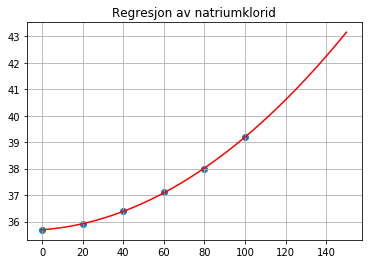

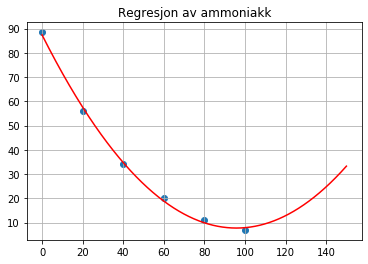

In [60]:
from pylab import *
#from sklearn.metrics import r2_score 

T = [0, 20, 40, 60, 80, 100]
sol_NH3 = [88.5, 56.0, 34.0, 20.0, 11.0, 7.0]
sol_NaCl = [35.7, 35.9, 36.4, 37.1, 38.0, 39.2]

#Regresjon av natruimklorid
grad = 2 
reg_NaCl = polyfit(T, sol_NaCl, grad)

x = linspace(0,150, 10000)
a = reg_NaCl[0]
b = reg_NaCl[1]
c = reg_NaCl[2]
y = a*x**2 + b * x + c


scatter(T, sol_NaCl)
plot(x,y, color = 'red')
title('Regresjon av natriumklorid')
grid()
show()


#Regresjon av ammoniakk
reg_NH3 = polyfit(T, sol_NH3, grad)

x = linspace(0,150, 10000)
a = reg_NH3[0]
b = reg_NH3[1]
c = reg_NH3[2]
y = a*x**2 + b * x + c

scatter(T, sol_NH3)
plot(x,y, color = 'red')
title('Regresjon av ammoniakk')
grid()
show()

### Viktige ting å huske på underveis når man utfører regresjon: 
- Når man endere på graden, må man også endre på funksjonen man bruker
- Man bruker scatter(x,y) for å få punktene til å dukke opp på en graf 
    - scatter(T, sol_NaCl)
- Man bruker polyfit(x, y, grad) for å lage regresjonsanalyse av punkene og i hvilken grad funskjonen skal være i
    - polyfit(T, sol_NaCl, grad)
- For å se om regresjonstabellen er god, kan man gjøre ulike analyser. En vanlig analyse er å finne R2
    - from sklearn.metrics import r2_score 
    - r2_score(y-verdi_eksakt, y-verdi_forutsett)
        - R2 ligger mellom 0 og 1 der 1 er best mulig tilpasning og null er værst tilpasning
- Med en modell kan vi ekstrapolere (forutsi utvikling framover), men man må være veldig forsiktig med det
- Selvom R2 modellen er 1, betyr det ikke nødvendigvis at den er bra til å forutsi ekstrapoleringen 


# Gjennomsnitt
### Gjennomsnittet av n målinger er definert som summen av alle målingene dividert på n 

* En statistisk analyse kan avdekke trender og mønstre i dataene våre 
* Det er viktig å ha kontroll på feil og måleusikkerhet
* Vi gjør ofte målinger for å minske usikkerheten i måledataene våre

### Målinger på spredning av dataene 
* Vi har flere målinger for spredninger av målinger: varians og standardavvik er de vanligste
* Standardavviket er definer som den positive kvadratroten av variansen, og er den vanligste måten å måle statistisk spredning på

# Dateringer
## Diagrammer
## Usikkerhetsstolpeplott 
* Der er også mange måter å grafisk framstille statistisk spredning på 
* Vi ser på usikkerhetsstolpeplott:
    * errorbar 

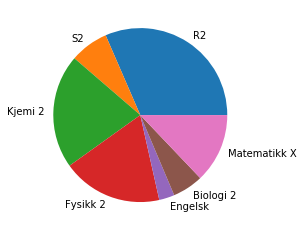

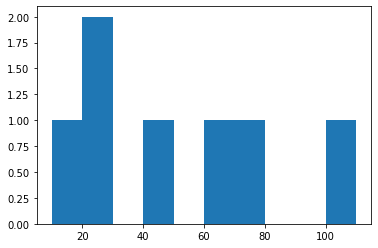

Det er ikke helt hvordan et histogram i forhold til variabelene som er oppgitt skal se ut, men det er sånn man skriver det inn i programmet


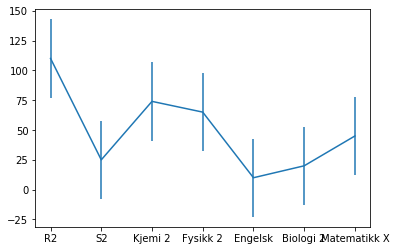

Errorbar skal helst ikke brukes til slike typer statistikk samlinger, men det er slik man skal skrive den inn i programmet


In [93]:
from pylab import *

fag = ['R2', 'S2', 'Kjemi 2', 'Fysikk 2', 'Engelsk', 'Biologi 2', 'Matematikk X']
antall = [110, 25, 74, 65, 10, 20, 45]

#kakediagram
pie(antall, labels = fag)
show()

#histogram (på en måte)
hist(antall)
show()
print("Det er ikke helt hvordan et histogram i forhold til variabelene som er oppgitt skal se ut, men det er sånn man skriver det inn i programmet")

#usikkerhetsstolpeplott (på en måte)
errorbar(fag, antall, std(antall))
show()
print("Errorbar skal helst ikke brukes til slike typer statistikk samlinger, men det er slik man skal skrive den inn i programmet")

### Kommentarer underveis: 
* Når vi lager histogram, blir det ikke alltid som man ønsker, siden den teller hvor mange ganger en variabel dukker opp i en array, ikke hvor mange som forekommer av variabelen. 
* errorbar(x,y,err) plots y versus x and draws a vertical error bar at each data point.
    * errorbar(fag, antall, std(antall))
    
## Hvordan lage histogram som faktisk gir mening: 

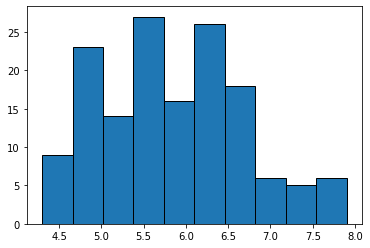

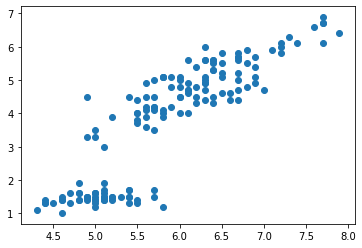

In [107]:
from pylab import *

data = loadtxt('irisblomster.txt', delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4))

sepal_length = data [:,1]
sepal_width = data [:,2]
petal_length = data [:,3]

hist(sepal_length, edgecolor = 'black')
show()

scatter(sepal_length, petal_length)
show()